# Assignment 8
##### Group member :Shichao Zhou, Maojudan Nihemaiti

# Introduction

This assignment task is to predict whether or not a given existing customer is likely to purchase an additional insurance project from the company.The company hope to improve its customer retention and sales practices by the output of such models.

The data set source is from https://www.kaggle.com/rluyck/insurance-company

Steps explanation:
- Data Dictionary
- Exploratory Data Analysis
- Data Preparation
  - MinMax Scale for numerical data
  - One hot encoding for categorical data
- Prepped Data Review (Re-run EDA)
- Feature selecting
  - Domain knowledge
  - SelectKbest
  
- Modeling
  - Model1 
  - Model2
  - Model3
- Select Models 
- Conclusion
- Reference


# Data Dictionary

In the dataset, the response variable is " Target " attribute. For more detailed description of all attributes, please see the below data dictionay.

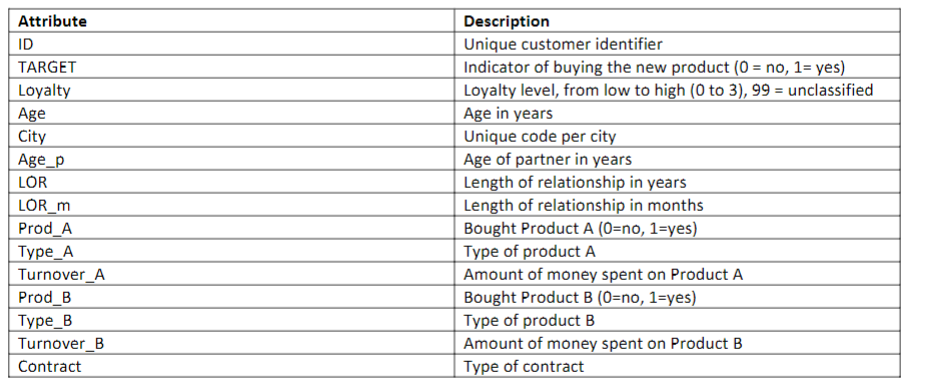

- Target: Response variable (Binary variable)
- Loyalty: Ordinal variable (Categorical variable)
- Age: Numerical variable
- City: Categorical variable
- Age_p: Numerical variable
- LOR: Numerical variable 
- LOR_M: Numerical variable
- Prod_A: Binary variable(Categorical variable)
- Type_A: Categorical variable
- Turnover_A:Numerical variable
- Prod_B: Binary variable(Categorical variable)
- Type_B: Categorical variable
- Turnover_B: Numerical variable
- Contract: Numerical variable

In [1]:
# Import libraries
import pandas as pd
import numpy as np
from pandas import Series, DataFrame
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_theme(style="ticks", color_codes=True)
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
from patsy import dmatrices
from sklearn import metrics
from imblearn.over_sampling import SMOTE
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.svm import LinearSVC
import warnings
warnings.filterwarnings("ignore")

### Read data

In [2]:
# Read the data from github
df = pd.read_csv("https://raw.githubusercontent.com/sczhou0705/DAV-6150-2/main/M7_Data.csv")

df.head()

,TARGET,loyalty,ID,age,city,LOR,prod_A,type_A,type_B,prod_B,turnover_A,turnover_B,contract,age_P,lor_M
0,Y,99,77,66,2,0,0,0,0,0,333.561114,264.721010,2,66,3
1,Y,1,159,45,2,3,1,3,3,1,394.735699,284.904978,2,45,39
2,Y,1,220,42,2,2,1,3,6,1,342.180990,1175.589721,2,42,27
3,Y,99,303,31,2,0,0,0,0,0,453.757916,242.341754,2,31,3
4,Y,99,306,62,2,0,0,0,0,0,384.577469,287.008370,2,62,3


In [3]:
# Check data size
df.shape

(14016, 15)

In [4]:
# Data description
df.describe()

,loyalty,ID,age,city,LOR,prod_A,type_A,type_B,prod_B,turnover_A,turnover_B,contract,age_P,lor_M
count,14016.000000,14016.000000,14016.000000,14016.000000,14016.000000,14016.000000,14016.000000,14016.000000,14016.000000,14016.000000,14016.000000,14016.0,14016.000000,14016.000000
mean,50.381778,37672.440068,35.882920,-710.950128,0.926299,0.533818,1.607877,1.918878,0.599458,379.161320,328.628207,2.0,35.882920,14.115582
std,48.471790,44855.639209,12.974634,26702.329184,0.965212,0.498873,1.508991,1.686038,0.490026,92.612207,475.616525,0.0,12.974634,11.582550
min,0.000000,1.000000,5.000000,-999999.000000,0.000000,0.000000,0.000000,0.000000,0.000000,300.095909,191.962852,2.0,5.000000,3.000000
25%,2.000000,6741.500000,25.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,334.919412,219.406925,2.0,25.000000,3.000000
50%,3.000000,13514.500000,33.000000,2.000000,1.000000,1.000000,3.000000,3.000000,1.000000,367.891493,237.656757,2.0,33.000000,15.000000
75%,99.000000,62738.000000,43.000000,2.000000,1.000000,1.000000,3.000000,3.000000,1.000000,399.744923,264.131538,2.0,43.000000,15.000000
max,99.000000,151811.000000,102.000000,235.000000,6.000000,1.000000,6.000000,9.000000,1.000000,5568.784139,12249.084770,2.0,102.000000,75.000000


The min of attribute "city" is -999999; it is negative data and seems like an invalid city code. We will replace them as "0" for representing unknown city codes or data entry errors.

In [5]:
# Check how many invalid data in city column
print(df[df.city ==-999999.000000].shape[0])

10


In [6]:
# Check what the percentage of the invalid data in city column
print(df[df.city ==-999999.000000].shape[0] / df.city.shape[0])

0.0007134703196347032


In [7]:
# Replace -999999with 0
df['city'] = df['city'].replace(-999999,0)

In [8]:
# Check missing data
df.isnull().sum()

TARGET        0
loyalty       0
ID            0
age           0
city          0
LOR           0
prod_A        0
type_A        0
type_B        0
prod_B        0
turnover_A    0
turnover_B    0
contract      0
age_P         0
lor_M         0
dtype: int64

In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14016 entries, 0 to 14015
Data columns (total 15 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   TARGET      14016 non-null  object 
 1   loyalty     14016 non-null  int64  
 2   ID          14016 non-null  int64  
 3   age         14016 non-null  int64  
 4   city        14016 non-null  int64  
 5   LOR         14016 non-null  int64  
 6   prod_A      14016 non-null  int64  
 7   type_A      14016 non-null  int64  
 8   type_B      14016 non-null  int64  
 9   prod_B      14016 non-null  int64  
 10  turnover_A  14016 non-null  float64
 11  turnover_B  14016 non-null  float64
 12  contract    14016 non-null  int64  
 13  age_P       14016 non-null  int64  
 14  lor_M       14016 non-null  int64  
dtypes: float64(2), int64(12), object(1)
memory usage: 1.6+ MB


In [10]:
# Check unique for each columns
df.nunique()

TARGET            2
loyalty           5
ID            11008
age              86
city             64
LOR               7
prod_A            2
type_A            3
type_B            4
prod_B            2
turnover_A    11008
turnover_B    11008
contract          1
age_P            86
lor_M             7
dtype: int64

- From the above output, "ID," "turnover_A," and "turnover_B" have 11008 unique values, while the data frame has 14016 rows. The dataset may have duplicate values. The following analysis would double-check it.
- We will drop the "contract" attribute because all the values are the same and are not meaning to do further analysis. 

In [11]:
# Drop "contract"
df = df.drop("contract",axis=1)


In [12]:
# Output duplciated rows
duplicate = df[df.groupby(['ID'])['turnover_A'].apply(lambda x: x.duplicated(keep=False))]
duplicate

,TARGET,loyalty,ID,age,city,LOR,prod_A,type_A,type_B,prod_B,turnover_A,turnover_B,age_P,lor_M
0,Y,99,77,66,2,0,0,0,0,0,333.561114,264.721010,66,3
1,Y,1,159,45,2,3,1,3,3,1,394.735699,284.904978,45,39
2,Y,1,220,42,2,2,1,3,6,1,342.180990,1175.589721,42,27
3,Y,99,303,31,2,0,0,0,0,0,453.757916,242.341754,31,3
4,Y,99,306,62,2,0,0,0,0,0,384.577469,287.008370,62,3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
14011,Y,99,151601,30,2,0,0,0,0,0,386.434278,284.309508,30,3
14012,Y,1,151634,27,2,2,1,3,3,1,376.842591,266.993794,27,27
14013,Y,99,151679,26,2,0,0,0,0,0,434.805703,284.629361,26,3
14014,Y,1,151804,75,2,1,1,3,3,1,366.273857,270.573265,75,15


In [13]:
# Check if the values of each columns are duplicated.
df[df['ID'] ==151811]

,TARGET,loyalty,ID,age,city,LOR,prod_A,type_A,type_B,prod_B,turnover_A,turnover_B,age_P,lor_M
3007,Y,99,151811,61,2,0,0,0,0,0,445.059067,217.425934,61,3
14015,Y,99,151811,61,2,0,0,0,0,0,445.059067,217.425934,61,3


In [14]:
# Remove deplicate
df = df.drop_duplicates(subset=None,keep='first',inplace=False)
df

,TARGET,loyalty,ID,age,city,LOR,prod_A,type_A,type_B,prod_B,turnover_A,turnover_B,age_P,lor_M
0,Y,99,77,66,2,0,0,0,0,0,333.561114,264.721010,66,3
1,Y,1,159,45,2,3,1,3,3,1,394.735699,284.904978,45,39
2,Y,1,220,42,2,2,1,3,6,1,342.180990,1175.589721,42,27
3,Y,99,303,31,2,0,0,0,0,0,453.757916,242.341754,31,3
4,Y,99,306,62,2,0,0,0,0,0,384.577469,287.008370,62,3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11003,N,1,16793,33,2,2,1,3,3,1,302.380331,229.457986,33,27
11004,N,99,16794,23,2,0,0,0,0,0,316.268616,228.518505,23,3
11005,N,1,16798,23,2,2,1,3,3,1,385.871241,236.665515,23,27
11006,N,99,16800,32,2,1,1,3,3,1,317.578868,226.899614,32,15


In [15]:
# Response variable " Target"
# Replace "Yes" with "1" and " No" with "0"
df = df.replace(to_replace=['N', 'Y'], value=[0, 1])



Based on the above head and tail output, we found "age" and "age_p" seem to give the same values for each row. Both of them have 86 unique values. The two columns convey the same information about how long the partnership between clients and the insurance company is. we would write the below codes for double-checking.

In [16]:
# Check every column and verify if the dataset have duplicated columns
def finding_duplicate_columns(data):
    col_name_list = [x for x in data.columns]
    print("length: ",len(col_name_list))
    duplicate_col2 = []
    i = 0
    while i<=len(col_name_list)-1:
        
        for j in range (1,len(col_name_list)):
            if data[col_name_list[i]].equals(data[col_name_list[j]]) == False:
                continue
            else:
                duplicate_col2.append((col_name_list[i],col_name_list[j]))
        col_name_list.pop(0)
    return duplicate_col2
duplicate_col = finding_duplicate_columns(df)
duplicate_col
   

length:  14


[('age', 'age_P')]

In [17]:
# Remove the duplicate column
df = df.drop(df.columns[3],axis=1)

In [18]:
df.describe()

,TARGET,loyalty,ID,city,LOR,prod_A,type_A,type_B,prod_B,turnover_A,turnover_B,age_P,lor_M
count,11008.000000,11008.000000,11008.000000,11008.000000,11008.000000,11008.000000,11008.000000,11008.000000,11008.000000,11008.000000,11008.000000,11008.000000,11008.000000
mean,0.273256,46.533612,27023.459938,2.600382,0.982649,0.584393,1.759448,2.097929,0.652253,372.332403,344.120565,34.845203,14.791788
std,0.445651,48.292402,38576.841141,8.684433,0.939415,0.492849,1.490133,1.671441,0.476277,96.685932,524.372413,13.032781,11.272981
min,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,300.095909,191.962852,5.000000,3.000000
25%,0.000000,2.000000,5480.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,332.229899,218.302029,24.000000,3.000000
50%,0.000000,3.000000,11025.500000,2.000000,1.000000,1.000000,3.000000,3.000000,1.000000,361.930298,235.025216,31.000000,15.000000
75%,1.000000,99.000000,16632.250000,2.000000,1.000000,1.000000,3.000000,3.000000,1.000000,391.567662,253.759401,42.000000,15.000000
max,1.000000,99.000000,151811.000000,235.000000,6.000000,1.000000,6.000000,9.000000,1.000000,5568.784139,12249.084770,102.000000,75.000000


### EDA for Response variable 

In [19]:
# Response variable
df_res = df['TARGET']

In [20]:
print(df['TARGET'].value_counts())

0    8000
1    3008
Name: TARGET, dtype: int64


In [21]:
3008/(8000+3008) *100

27.325581395348834

The result indicates that 27.33% customers sign up for the new product.

<AxesSubplot:xlabel='TARGET', ylabel='count'>

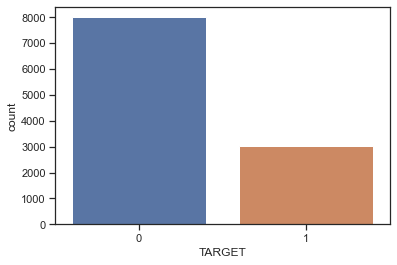

In [22]:
sns.countplot(x="TARGET", data=df)

#### EDA of numerical variables 

In [23]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 11008 entries, 0 to 11007
Data columns (total 13 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   TARGET      11008 non-null  int64  
 1   loyalty     11008 non-null  int64  
 2   ID          11008 non-null  int64  
 3   city        11008 non-null  int64  
 4   LOR         11008 non-null  int64  
 5   prod_A      11008 non-null  int64  
 6   type_A      11008 non-null  int64  
 7   type_B      11008 non-null  int64  
 8   prod_B      11008 non-null  int64  
 9   turnover_A  11008 non-null  float64
 10  turnover_B  11008 non-null  float64
 11  age_P       11008 non-null  int64  
 12  lor_M       11008 non-null  int64  
dtypes: float64(2), int64(11)
memory usage: 1.5 MB


In [24]:
# for numerical data
df_num = df.iloc[:,[10,9,11,4,12]]
df_num

,turnover_B,turnover_A,age_P,LOR,lor_M
0,264.721010,333.561114,66,0,3
1,284.904978,394.735699,45,3,39
2,1175.589721,342.180990,42,2,27
3,242.341754,453.757916,31,0,3
4,287.008370,384.577469,62,0,3
...,...,...,...,...,...
11003,229.457986,302.380331,33,2,27
11004,228.518505,316.268616,23,0,3
11005,236.665515,385.871241,23,2,27
11006,226.899614,317.578868,32,1,15


In [25]:
df_num_res = pd.concat([df_num, df_res],axis=1)
df_num_res.corr()['TARGET']

turnover_B   -0.084418
turnover_A    0.201813
age_P         0.227510
LOR          -0.171396
lor_M        -0.171396
TARGET        1.000000
Name: TARGET, dtype: float64

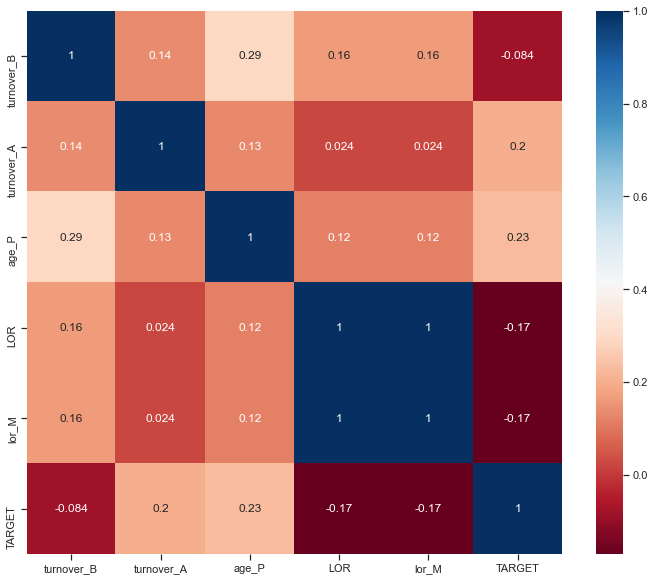

In [26]:
# Use the heatmap to visualize the correlation between each feature

# Finding the correlation bewteen the Features.
plt.figure(figsize=(12,10))

corr = df_num_res.corr()
# Plot the heatmap
sns.heatmap(corr, cmap="RdBu",xticklabels=corr.columns.values, yticklabels=corr.columns.values, annot=True)

# Show the heatmap
plt.show()

- From the above heatmap, we can find the correlation between lor and lor_M is 1. For avoiding multicollinearity,we will drop LOR. 
- TurnoverA and age_P have the positive relationship with Target; Lor and loc_M show the negative relationship with Target.
- The relationship between TurnoverA and age_P and target is stronger than Lor and loc_M attributes.

In [27]:
# Remove the duplicate column
df_num = df_num.drop(df_num.columns[3],axis=1)

array([[<AxesSubplot:title={'center':'turnover_B'}>,
        <AxesSubplot:title={'center':'turnover_A'}>],
       [<AxesSubplot:title={'center':'age_P'}>,
        <AxesSubplot:title={'center':'lor_M'}>]], dtype=object)

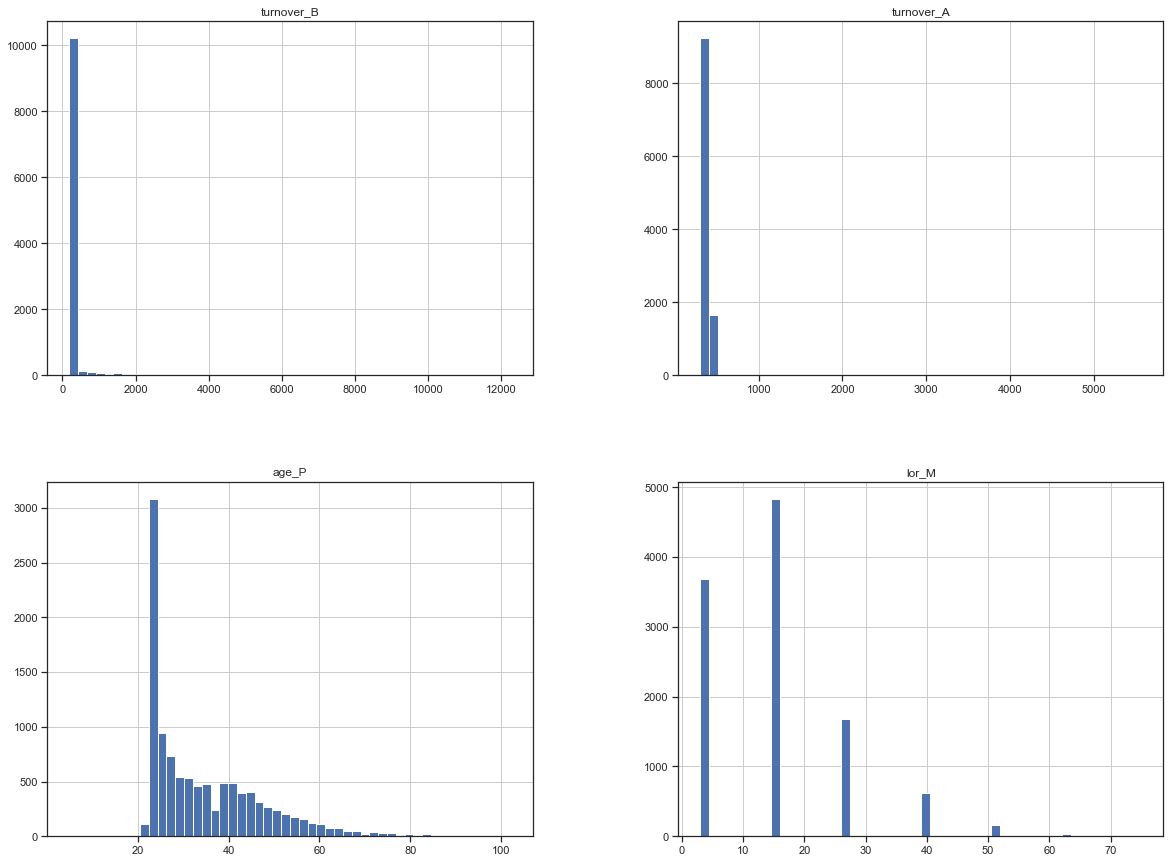

In [28]:
df_num.hist(bins=50, figsize=(20,15))

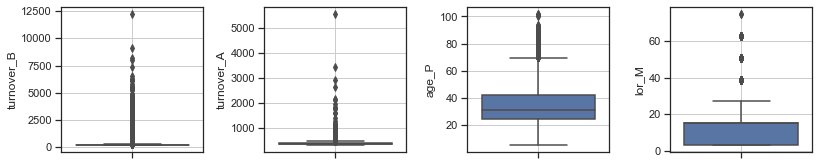

In [29]:
plt.figure(figsize = (20, 16))
for i, col in enumerate(df_num):
    plt.subplot(7,7, i + 1)
    sns.boxplot(data=df_num,y=col,orient="v")
    plt.grid()
    plt.tight_layout()

- The numerical data is imbalanced. Three of the features have right long tails, and they are right-skewed distribution.
- The turnover_B and A have obvious outliers, representing that some clients spend much money on products A and B.

#### EDA of categorical variables 

In [30]:
# For categorical data
df_cat = df.iloc[:,[1,5,8,6,7,3]]
df_cat

,loyalty,prod_A,prod_B,type_A,type_B,city
0,99,0,0,0,0,2
1,1,1,1,3,3,2
2,1,1,1,3,6,2
3,99,0,0,0,0,2
4,99,0,0,0,0,2
...,...,...,...,...,...,...
11003,1,1,1,3,3,2
11004,99,0,0,0,0,2
11005,1,1,1,3,3,2
11006,99,1,1,3,3,2


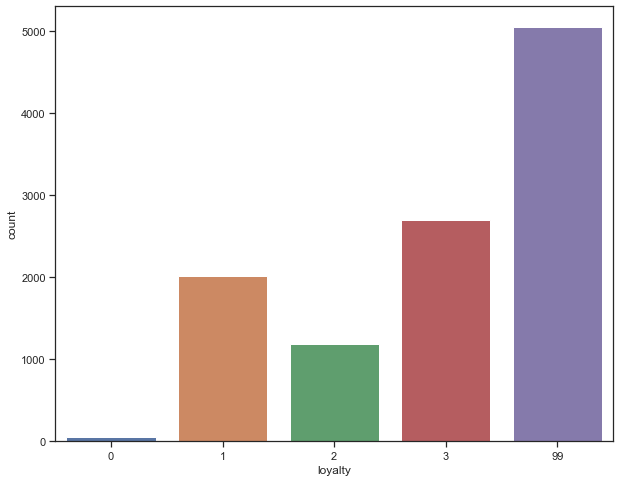

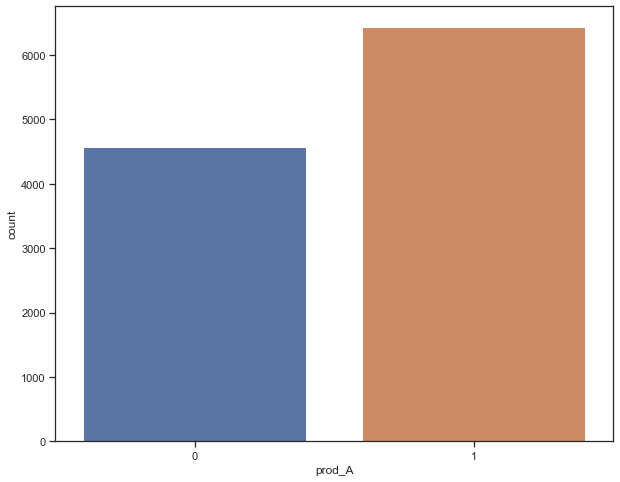

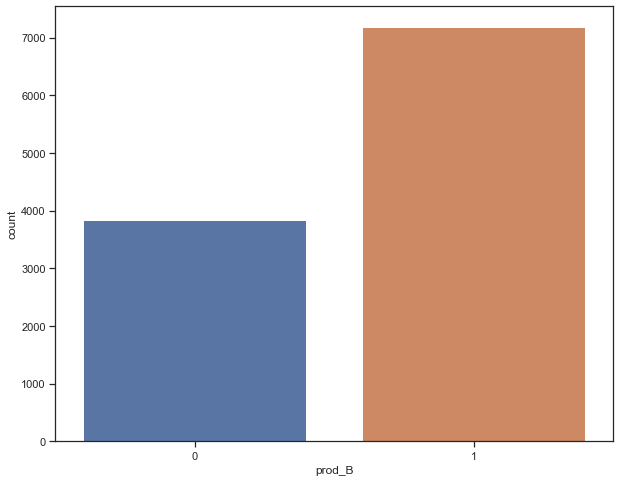

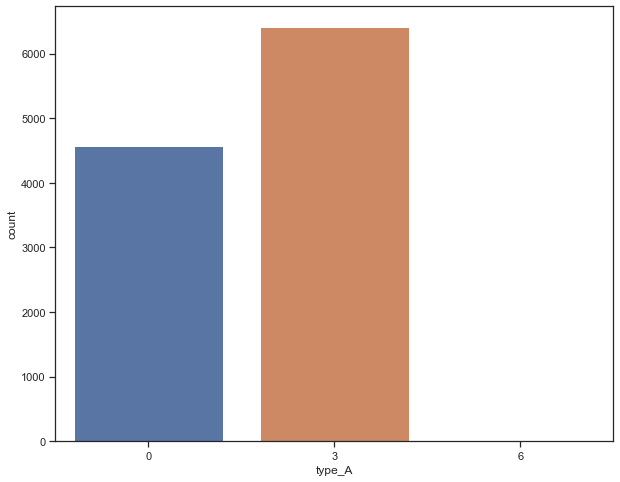

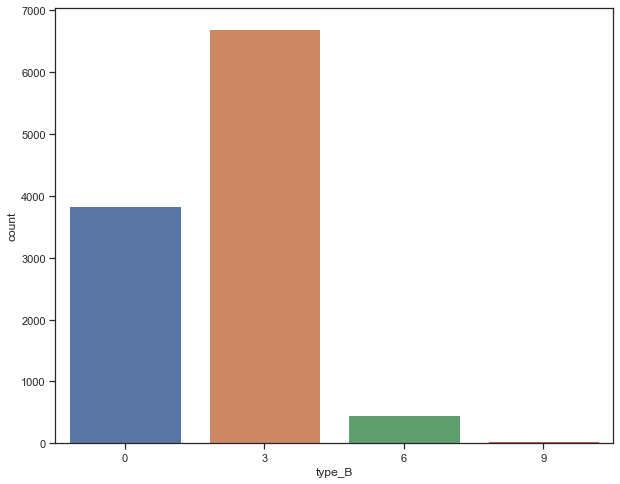

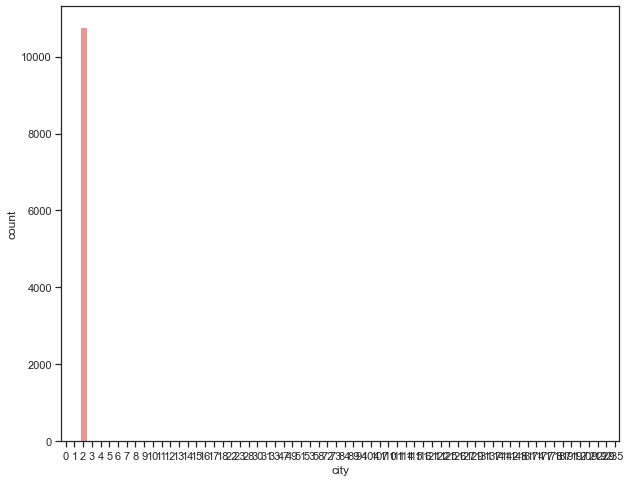

In [31]:
# Distribution of categorical data
for col in df_cat.columns:
    plt.figure(figsize=(10, 8))
    ax = sns.countplot(x=col, data=df_cat)

- All the categorical attributes are imbalanced.
- Loyalty 99 (unclassified) is in the first ranking. Loyalty 0 (low) rank the last.
- The number of customers who bought product A was far more than those who did not purchase product A.
- The number of customers who bought product B was far more than those who did not purchase product B.
- Product A of Type_3 was more popular among the existing customers.Type_6 was the least popular among the current customers.
- The product B of Type_3 was more popular among the existing customers.Type_6& type_9 were the least popular among the current customers.
- Most of the people who bought the products lived in city code 2.

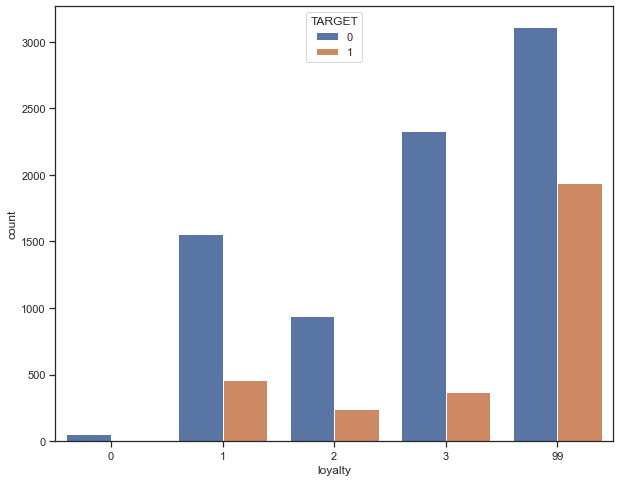

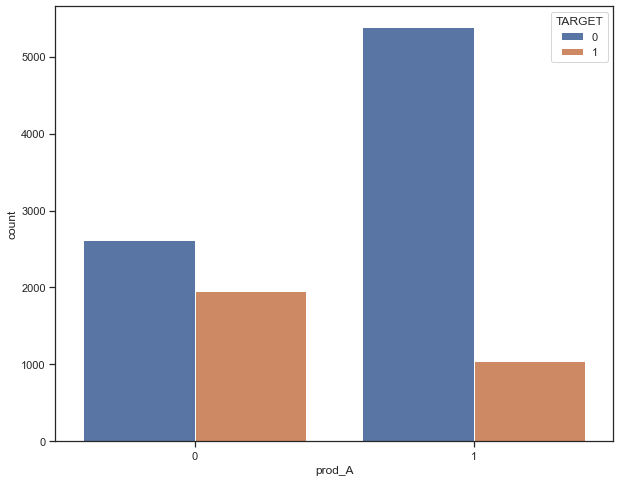

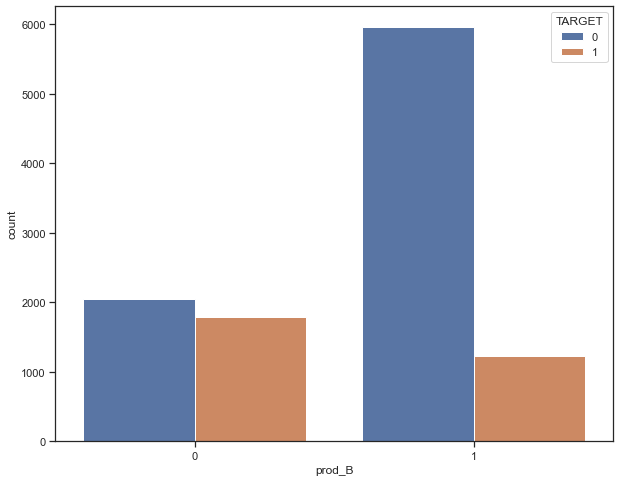

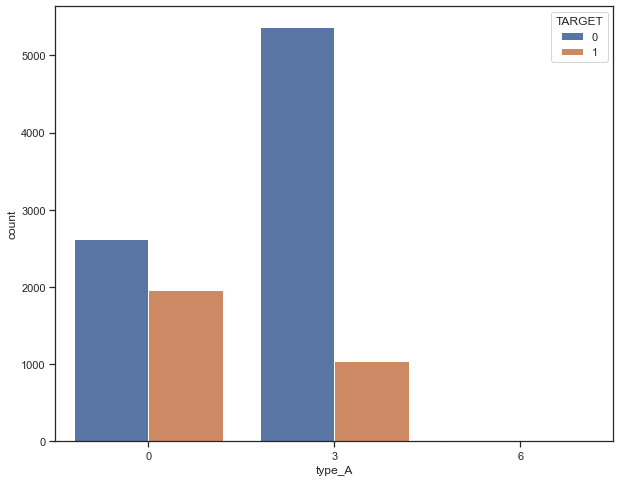

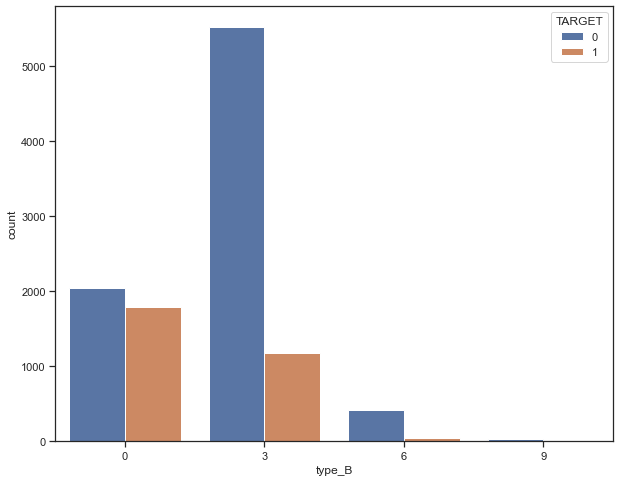

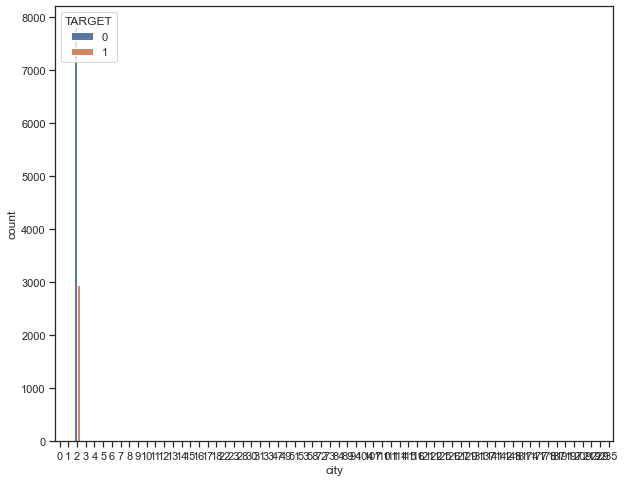

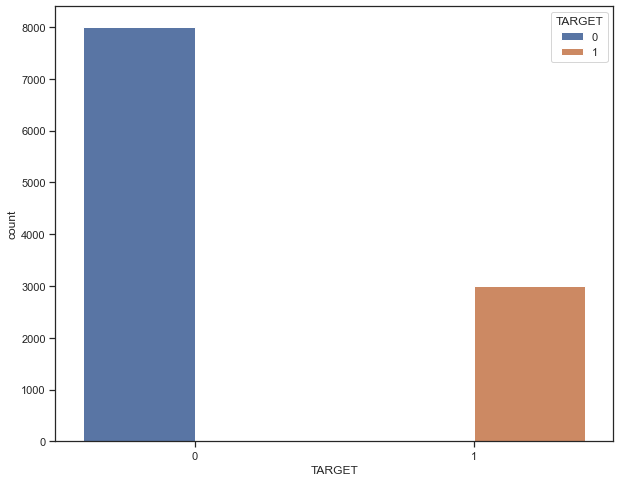

In [32]:
# Distribution of categorical data with 'target'.
df_cat_res = pd.concat([df_cat,df_res],axis = 1)
for col in df_cat_res.columns:
    plt.figure(figsize=(10, 8))
    ax = sns.countplot(x=col, hue='TARGET',data=df_cat_res)

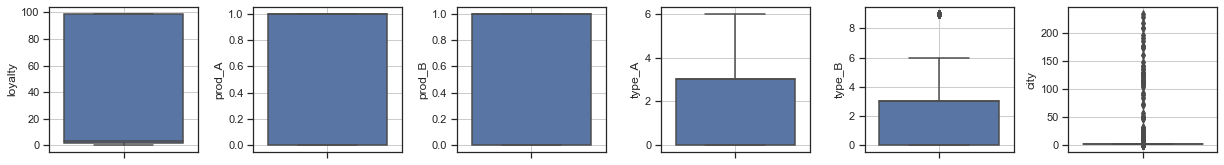

In [33]:
plt.figure(figsize = (20, 16))
for i, col in enumerate(df_cat):
    plt.subplot(7,7, i + 1)
    sns.boxplot(data=df_cat,y=col,orient="v")
    plt.grid()
    plt.tight_layout()

- In the loyalty attribute, no matter which group, the number of people who did not buy the products was more than those who bought the products.
- Most of the client's city code is 2.
- In product, A attribute, no matter which group, the number of people who did not buy the products was more than those who bought the products.
- In product B attribute, no matter which group, the number of people who did not buy the products was more than those who bought the products.
- For type A and B, no matter which group, the number of people who did not buy the products were more than those who bought the products.

## Data preparation

In this section, we will do the following steps.
- Scale the numerical data.
- Dummy the categorical data.
- Use the SMOTE method to over-sample the response variable.
- Apply feature selection method and domain knowledge to choose three groups of explanatory variables.

#### Numerical data

In [34]:
# Scale the numercial data

In [35]:
minmax_scale= (df_num-df_num.min())/(df_num.max()-df_num.min())
df_num_scale= pd.DataFrame(minmax_scale)
df_num_scale

,turnover_B,turnover_A,age_P,lor_M
0,0.006034,0.006352,0.628866,0.000000
1,0.007708,0.017963,0.412371,0.500000
2,0.081581,0.007988,0.381443,0.333333
3,0.004178,0.029165,0.268041,0.000000
4,0.007883,0.016035,0.587629,0.000000
...,...,...,...,...
11003,0.003110,0.000434,0.288660,0.333333
11004,0.003032,0.003070,0.185567,0.000000
11005,0.003708,0.016280,0.185567,0.333333
11006,0.002898,0.003318,0.278351,0.166667


#### Categorical data

In [36]:
df_cat.shape

(11008, 6)

In [37]:
df_cat

,loyalty,prod_A,prod_B,type_A,type_B,city
0,99,0,0,0,0,2
1,1,1,1,3,3,2
2,1,1,1,3,6,2
3,99,0,0,0,0,2
4,99,0,0,0,0,2
...,...,...,...,...,...,...
11003,1,1,1,3,3,2
11004,99,0,0,0,0,2
11005,1,1,1,3,3,2
11006,99,1,1,3,3,2


In [38]:
# Check how many labels in each categorical columns
for col in df_cat.columns:
    print(col,":",len(df_cat[col].unique()),' labels')

loyalty : 5  labels
prod_A : 2  labels
prod_B : 2  labels
type_A : 3  labels
type_B : 4  labels
city : 64  labels


In [39]:
# Take city as example to check the sorting.
df_cat.city.value_counts().sort_values(ascending=False)

2      10769
0         28
8         17
1         17
9         16
       ...  
191        1
121        1
73         1
17         1
161        1
Name: city, Length: 64, dtype: int64

In [40]:
city_2_percent = (df_cat[df_cat.city == 2].shape[0] / df_cat.city.shape[0])*100
city_2_percent

97.82885174418605

As the analysis from the EDA, we found most of the clients'city code are 2. The '2' city code account for 97.83% in the city column.So we will merge other city codes as 'other' type.

In [41]:
df_cat['city'] = df_cat['city'].apply(lambda x: 'city_2' if x == 2 else 'city_other')

In [42]:
# Check 
df_cat.city.value_counts()

city_2        10769
city_other      239
Name: city, dtype: int64

In [43]:
# Create function for storing the label as list
def label_list(col):
    col_list = [x for x in col.value_counts().sort_values(ascending=False).head().index]
    return col_list

type_A_list = label_list(df_cat.type_A)
type_B_list = label_list(df_cat.type_B)
city_list = label_list(df_cat.city)
loyalty_list = label_list(df_cat.loyalty)
print(type_A_list)
print('---')
print(type_B_list)
print('---')
print(city_list)
print('---')
print(loyalty_list)

[3, 0, 6]
---
[3, 0, 6, 9]
---
['city_2', 'city_other']
---
[99, 3, 1, 2, 0]


In [44]:
# Dummy the df_cat
# Get dummy the column loyalty
df_cat_loyalty = pd.get_dummies(df_cat['loyalty'])
df_cat_loyalty.columns = ['loyalty_0', 'loyalty_1', 'loyalty_2','loyalty_3','loyalty_99']
df_cat_loyalty

,loyalty_0,loyalty_1,loyalty_2,loyalty_3,loyalty_99
0,0,0,0,0,1
1,0,1,0,0,0
2,0,1,0,0,0
3,0,0,0,0,1
4,0,0,0,0,1
...,...,...,...,...,...
11003,0,1,0,0,0
11004,0,0,0,0,1
11005,0,1,0,0,0
11006,0,0,0,0,1


In [45]:
# Get dummy the column city
df_cat_city = pd.get_dummies(df_cat['city'])
df_cat_city = df_cat_city.add_prefix('city_')
df_cat_city

,city_city_2,city_city_other
0,1,0
1,1,0
2,1,0
3,1,0
4,1,0
...,...,...
11003,1,0
11004,1,0
11005,1,0
11006,1,0


In [46]:
# Get dummy the column type_A
df_cat_type_A = pd.get_dummies(df_cat['type_A'])
df_cat_type_A.columns = ['type_A_0', 'type_A_3', 'type_A_6']
df_cat_type_A

,type_A_0,type_A_3,type_A_6
0,1,0,0
1,0,1,0
2,0,1,0
3,1,0,0
4,1,0,0
...,...,...,...
11003,0,1,0
11004,1,0,0
11005,0,1,0
11006,0,1,0


In [47]:
# Get dummy the column type_B
df_cat_type_B = pd.get_dummies(df_cat['type_B'])
df_cat_type_B.columns = ['type_B_0', 'type_B_3', 'type_B_6', 'type_B_9']
df_cat_type_B

,type_B_0,type_B_3,type_B_6,type_B_9
0,1,0,0,0
1,0,1,0,0
2,0,0,1,0
3,1,0,0,0
4,1,0,0,0
...,...,...,...,...
11003,0,1,0,0
11004,1,0,0,0
11005,0,1,0,0
11006,0,1,0,0


In [48]:
# Update df_cat 
# Combine the updated categorical data
df_cat_update=[df_cat_loyalty,df_cat_type_A,df_cat_type_B,df_cat_city]
df_cat_update=pd.concat(df_cat_update,axis=1)
df_cat_update

,loyalty_0,loyalty_1,loyalty_2,loyalty_3,loyalty_99,type_A_0,type_A_3,type_A_6,type_B_0,type_B_3,type_B_6,type_B_9,city_city_2,city_city_other
0,0,0,0,0,1,1,0,0,1,0,0,0,1,0
1,0,1,0,0,0,0,1,0,0,1,0,0,1,0
2,0,1,0,0,0,0,1,0,0,0,1,0,1,0
3,0,0,0,0,1,1,0,0,1,0,0,0,1,0
4,0,0,0,0,1,1,0,0,1,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11003,0,1,0,0,0,0,1,0,0,1,0,0,1,0
11004,0,0,0,0,1,1,0,0,1,0,0,0,1,0
11005,0,1,0,0,0,0,1,0,0,1,0,0,1,0
11006,0,0,0,0,1,0,1,0,0,1,0,0,1,0


In [49]:
df_update = pd.concat([df_num_scale, df_cat_update,df_res],axis=1)

From the EDA part,we can see the imbalance class in the response,so we will use the SMOTE algorithm to resample the reponse.

In [50]:
# Oversample imbalanced dataset with SMOTE
from collections import Counter
X = df_update.iloc[:,0:18]
y = df_res
counter = Counter(y)
print(counter)
# transform the dataset
oversample = SMOTE(random_state=0)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)
X_train, y_train = oversample.fit_resample(X_train, y_train)
print(len(X_train))
# summarize the new class distribution
counter = Counter(y_train)
print(counter)
print(y_train.values.sum() / y_train.shape[0])
print(X_train.shape, X_test.shape,y_train.shape,y_test.shape)

Counter({0: 8000, 1: 3008})
11146
Counter({1: 5573, 0: 5573})
0.5
(11146, 18) (3303, 18) (11146,) (3303,)


After applying SMOTE, we have a balanced class. The null error rate for the data is now 0.5. 

In [51]:
# Select features for categorical data
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import chi2
X = df_cat_update
y = df_res
print("Feature data dimension: ", X.shape)
print("----")
select = SelectKBest(score_func=chi2, k=14)
fit = select.fit(X,y)
# type(fit)
scores = pd.DataFrame(fit.scores_)
columns = pd.DataFrame(X.columns)
# Concat two dataframes for better visualization 
featureScores = pd.concat([columns,scores],axis=1)
featureScores.columns = ['Features','Score'] 
# Print 8 best features
print(featureScores.nlargest(14,'Score'))
print('------')
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import f_regression
# Apply SelectKBest class to extract top 4 best features
bestfeatures = SelectKBest(score_func=f_regression, k=4)
X = df_num_scale
y = df_res
fit = bestfeatures.fit(X,y)
dfscores = pd.DataFrame(fit.scores_)
dfcolumns = pd.DataFrame(X.columns)
# Concat two dataframes for better visualization 
featureScores = pd.concat([dfcolumns,dfscores],axis=1)
# Naming the dataframe columns
featureScores.columns = ['Features','Score'] 
# Print 4 best features
print(featureScores.nlargest(4,'Score'))

Feature data dimension:  (11008, 14)
----
           Features       Score
8          type_B_0  720.299703
5          type_A_0  553.060079
6          type_A_3  395.531613
9          type_B_3  318.216850
4        loyalty_99  311.271079
3         loyalty_3  255.315985
10         type_B_6   75.847435
2         loyalty_2   28.971595
0         loyalty_0   21.056000
1         loyalty_1   20.519212
11         type_B_9    7.514373
13  city_city_other    1.454316
7          type_A_6    0.111963
12      city_city_2    0.032276
------
     Features       Score
2       age_P  600.778456
1  turnover_A  467.288165
3       lor_M  333.102929
0  turnover_B   78.997032


We use the chi-square test for categorical data. We calculate the chi-square between each feature and the target and select the desired number of features with high Chi-square scores. We use the f-regression test for numerical data to get the scores between each feature and the target.
From the numerical features, we can see the turnover_A(price) has a higher score than turnover_B(price), but for the categorical attributes, the best score is the product of type B,not the type of product A. Based on our common sense and domain knowledge, we know that not only does the price of each product affect consumers' desire to buy, but the specific type of each product also has a corresponding effect on whether customers buy or not. Therefore, we only consider features related to product A in the first model, and in the second model, we choose features related to product B. 
Comparing Model 1 and Model 2, we want to see which product has a greater impact on the target, and which model performs better.In addition, since our target customers are existing clients, we will select the loyalty_2 and loyalty_3 features based on feature selection results. Even if loyalty_99 gets a 311.27 score, we would not consider it because 99 means unclassified values. The third model is to combine features from the first model with the second model for comprehensive evaluation. 




In [52]:
df_update.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 11008 entries, 0 to 11007
Data columns (total 19 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   turnover_B       11008 non-null  float64
 1   turnover_A       11008 non-null  float64
 2   age_P            11008 non-null  float64
 3   lor_M            11008 non-null  float64
 4   loyalty_0        11008 non-null  uint8  
 5   loyalty_1        11008 non-null  uint8  
 6   loyalty_2        11008 non-null  uint8  
 7   loyalty_3        11008 non-null  uint8  
 8   loyalty_99       11008 non-null  uint8  
 9   type_A_0         11008 non-null  uint8  
 10  type_A_3         11008 non-null  uint8  
 11  type_A_6         11008 non-null  uint8  
 12  type_B_0         11008 non-null  uint8  
 13  type_B_3         11008 non-null  uint8  
 14  type_B_6         11008 non-null  uint8  
 15  type_B_9         11008 non-null  uint8  
 16  city_city_2      11008 non-null  uint8  
 17  city_city_ot

In [53]:
# The features of the model focus on month, type of products and loyalty
df_update_model1 = df_update.iloc[:,[1,2,3,9,10,6,7]]
df_update_model1

,turnover_A,age_P,lor_M,type_A_0,type_A_3,loyalty_2,loyalty_3
0,0.006352,0.628866,0.000000,1,0,0,0
1,0.017963,0.412371,0.500000,0,1,0,0
2,0.007988,0.381443,0.333333,0,1,0,0
3,0.029165,0.268041,0.000000,1,0,0,0
4,0.016035,0.587629,0.000000,1,0,0,0
...,...,...,...,...,...,...,...
11003,0.000434,0.288660,0.333333,0,1,0,0
11004,0.003070,0.185567,0.000000,1,0,0,0
11005,0.016280,0.185567,0.333333,0,1,0,0
11006,0.003318,0.278351,0.166667,0,1,0,0


In [54]:
df_update_model2 = df_update.iloc[:,[0,2,3,12,13,6,7]]
df_update_model2

,turnover_B,age_P,lor_M,type_B_0,type_B_3,loyalty_2,loyalty_3
0,0.006034,0.628866,0.000000,1,0,0,0
1,0.007708,0.412371,0.500000,0,1,0,0
2,0.081581,0.381443,0.333333,0,0,0,0
3,0.004178,0.268041,0.000000,1,0,0,0
4,0.007883,0.587629,0.000000,1,0,0,0
...,...,...,...,...,...,...,...
11003,0.003110,0.288660,0.333333,0,1,0,0
11004,0.003032,0.185567,0.000000,1,0,0,0
11005,0.003708,0.185567,0.333333,0,1,0,0
11006,0.002898,0.278351,0.166667,0,1,0,0


In [55]:
# Only consider type A & B 
df_update_model3 = df_update.iloc[:,[0,1,2,3,9,10,12,13,6,7]]
df_update_model3

,turnover_B,turnover_A,age_P,lor_M,type_A_0,type_A_3,type_B_0,type_B_3,loyalty_2,loyalty_3
0,0.006034,0.006352,0.628866,0.000000,1,0,1,0,0,0
1,0.007708,0.017963,0.412371,0.500000,0,1,0,1,0,0
2,0.081581,0.007988,0.381443,0.333333,0,1,0,0,0,0
3,0.004178,0.029165,0.268041,0.000000,1,0,1,0,0,0
4,0.007883,0.016035,0.587629,0.000000,1,0,1,0,0,0
...,...,...,...,...,...,...,...,...,...,...
11003,0.003110,0.000434,0.288660,0.333333,0,1,0,1,0,0
11004,0.003032,0.003070,0.185567,0.000000,1,0,1,0,0,0
11005,0.003708,0.016280,0.185567,0.333333,0,1,0,1,0,0
11006,0.002898,0.003318,0.278351,0.166667,0,1,0,1,0,0


## Rerun EDA

array([[<AxesSubplot:title={'center':'turnover_B'}>,
        <AxesSubplot:title={'center':'turnover_A'}>],
       [<AxesSubplot:title={'center':'age_P'}>,
        <AxesSubplot:title={'center':'lor_M'}>]], dtype=object)

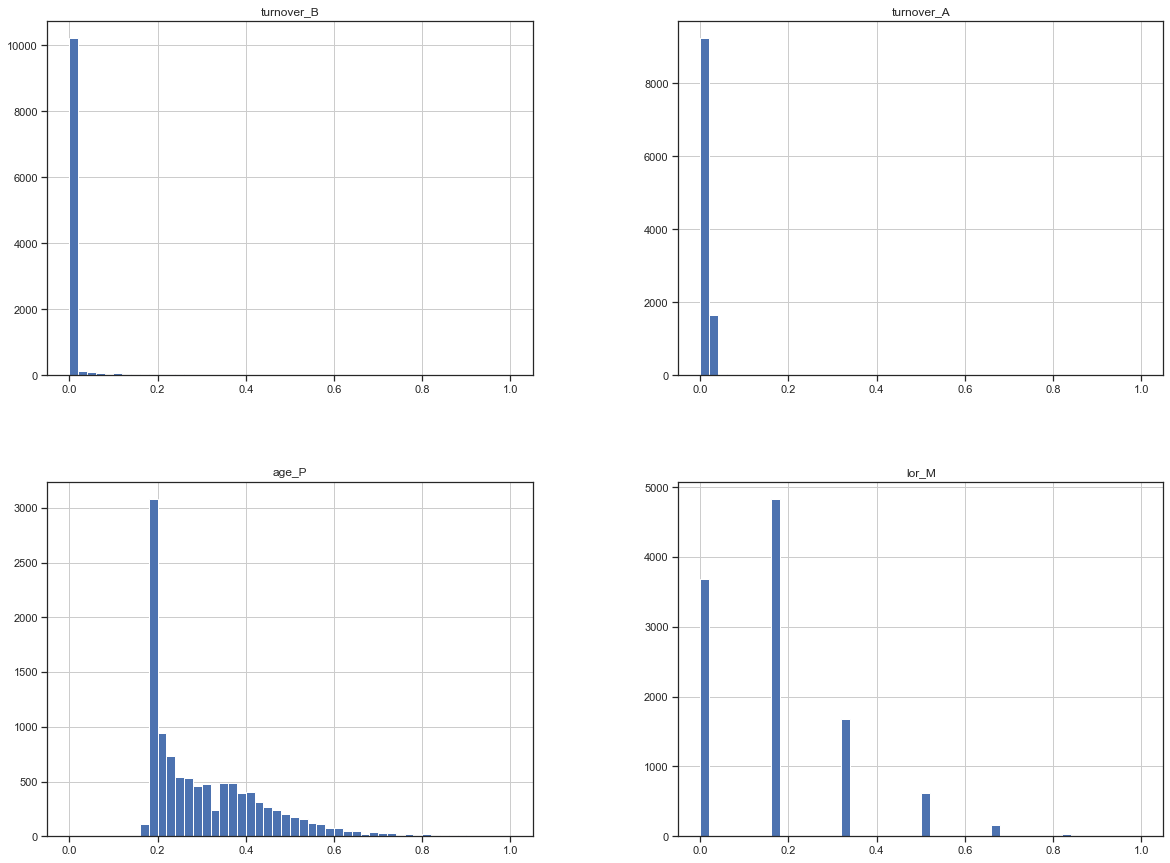

In [56]:
# Re-run numerical data after scaling
df_num_scale.hist(bins=50, figsize=(20,15))

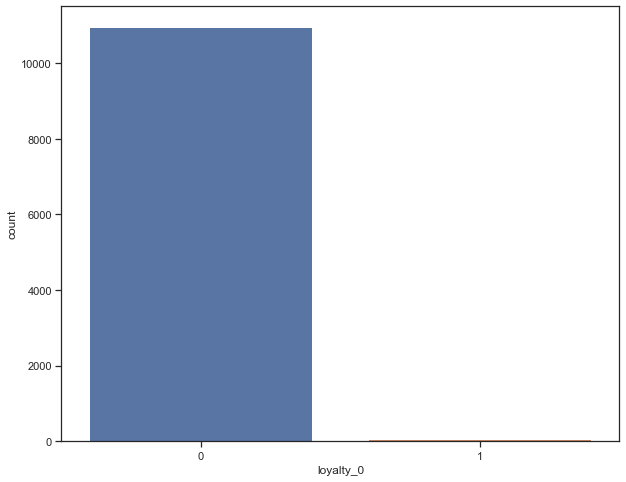

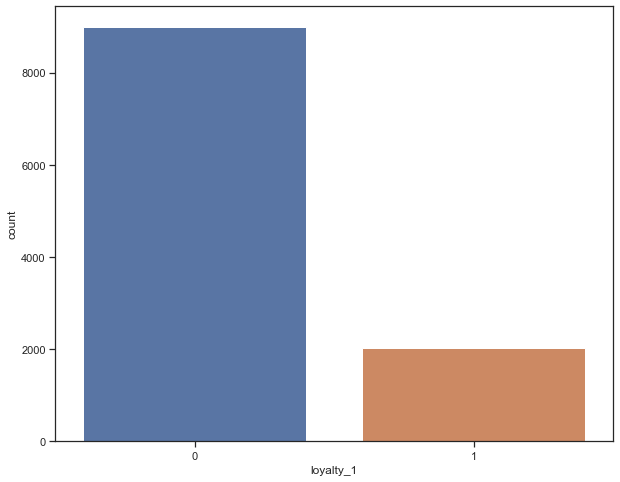

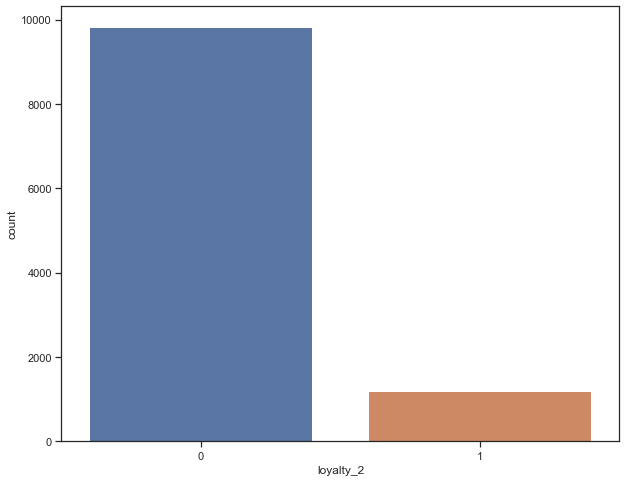

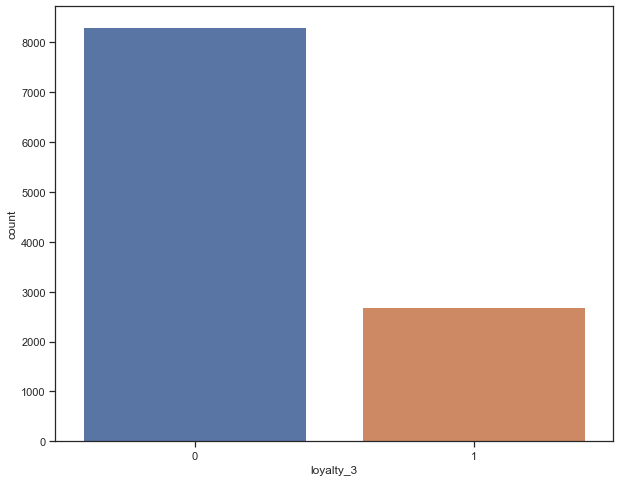

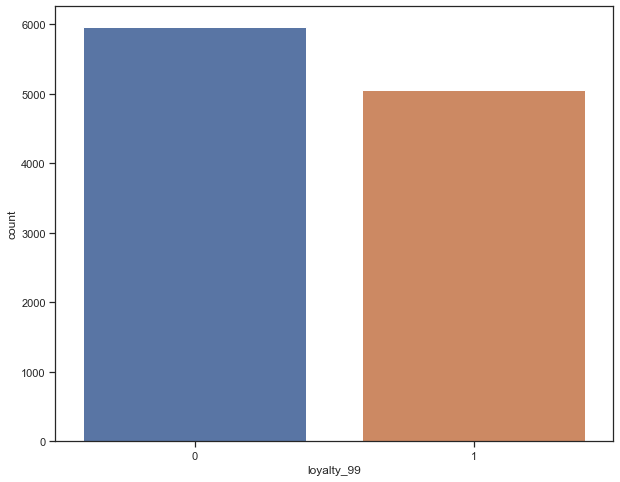

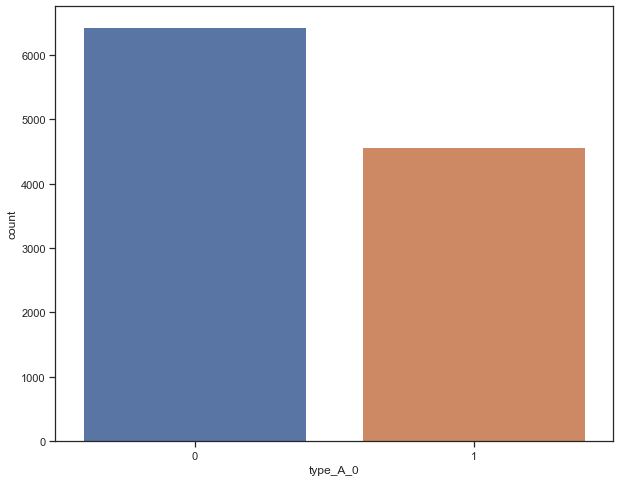

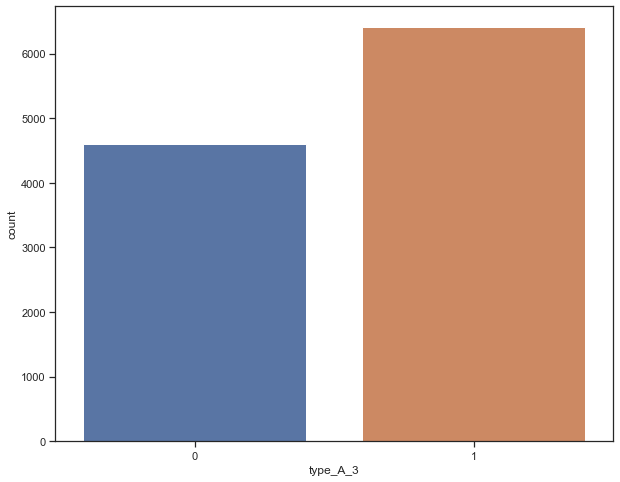

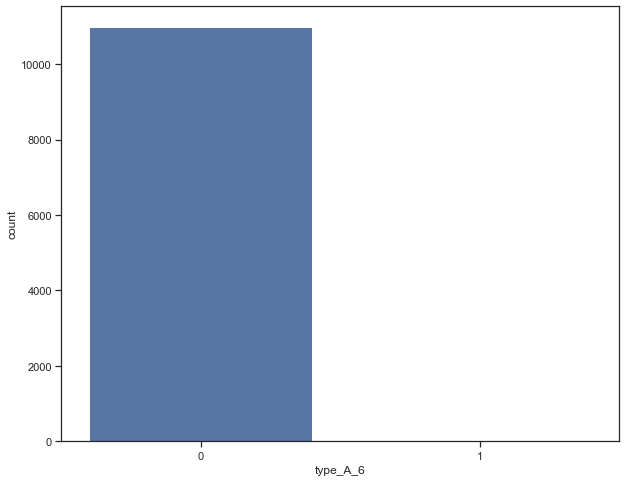

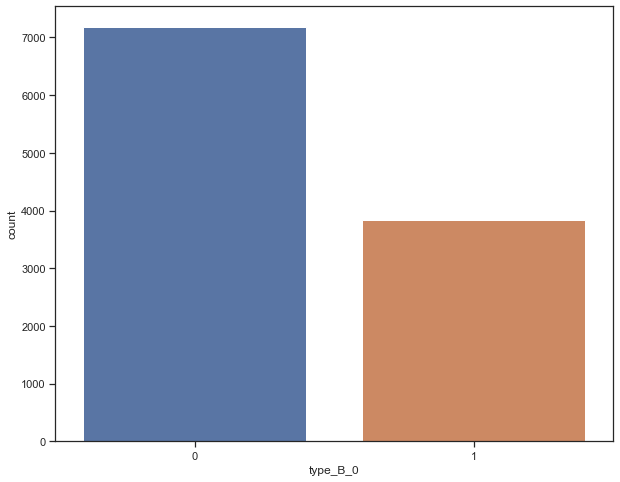

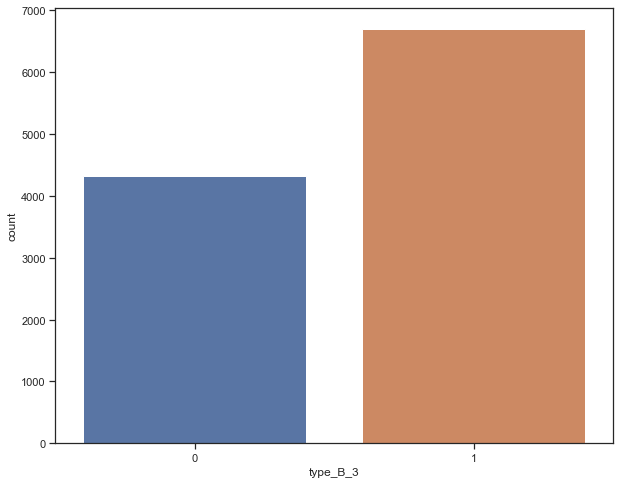

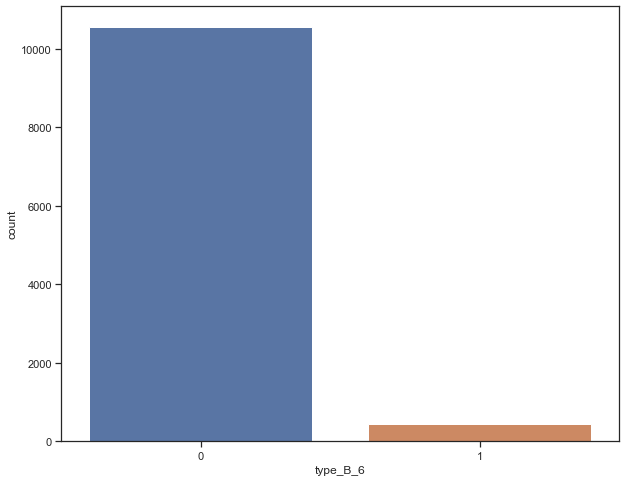

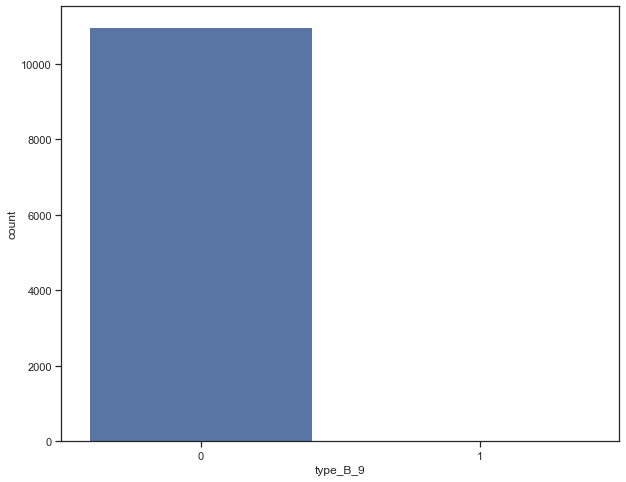

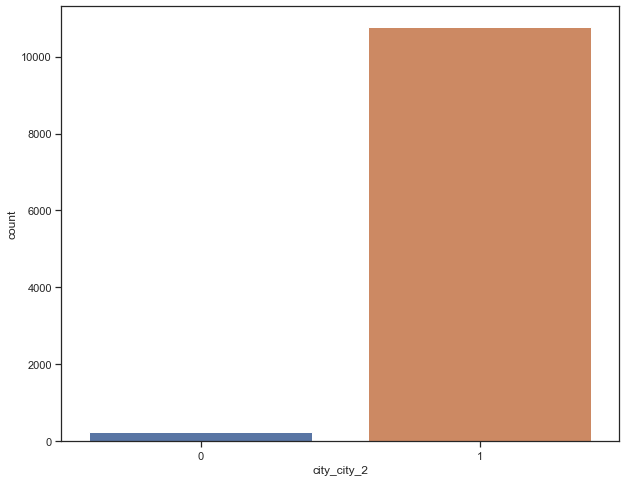

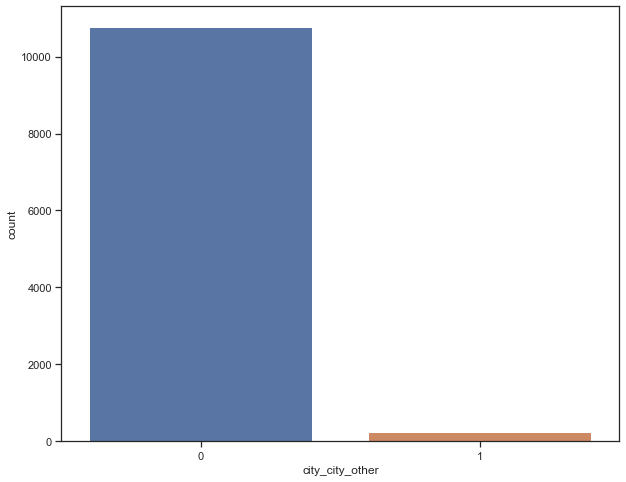

In [57]:
# Rerun categorical data after one hot encoding
for col in df_cat_update.columns:
    plt.figure(figsize=(10, 8))
    ax = sns.countplot(x=col, data=df_cat_update)

__Numercial data__
- For these plots, their x range is from 0 and 1 after Minmax scaling.

__Categorical data__
- In the group of low-level loyalty(0), over 10000 existing customers did not buy the products.
- In the group of low-level loyalty(1), over 8000 existing customers did not buy the products. Only around 2000 current customers purchased the products.
- In the group of medium level loyalty(2), over 9000 existing customers did not buy the product. Less than 2000 customers purchased the products.
- In the group of high-level loyalty(3), over 8000 existing customers did not buy the products. Over 2000 customers have the buying experience, and the number of buying was the highest among the level groups.
- Since loyalty(99) means an unclassified group, so we will not consider it.
- For type_A_0 products, more people were not willing to buy the products than whose purchased the product.
- For type_A_3 products, Over 6000 people bought the products, far more than the people who haven't the buying experience.
- For type_A_6 products, no customers bought the products.
- For type_B_0 products, over 7000 customers did not buy the products, far more than the people who bought the products.
- For type_B_3 products, these products have outstanding selling records because more than 6000 people bought the products.
- For type_B_6 products, most of the customers did not buy the product.
- For type_B_9 products, no customers bought the products.
- For the customers who lived in city code 2, over 10000 of them have bought the products.
- For the customers who lived in other city codes, most of them did not buy the products.

## Construct model

In this section we will create 3 KNN models,SVM models and 3 logistic models. 

### KNN Modeling
We will use the cross-validation method to select the best 'K' value for the optimal number of neighbors.
- Define a function for creating a plot showing how the accuracy scores change with the different k values and select the optimal k value.(Some of the code were from https://www.youtube.com/watch?v=j-uHsi-KjOs&t=304s&ab_channel=MonkHaus ) 
- Use the optimal k value and conduct cross-validation on the training set.
- Get the results of performance metrics.


In [58]:
# Select the best value for 'k'
# Because k value can only be odd numbers, the range step is 2.
def cross_vali_knn(X,y,scoring_param):
    k_values = [i for i in range(1,50,2)]
# Empty list that will hold cv scores.
    k_acc_scores = []
    for k in k_values:
        knn = KNeighborsClassifier(n_neighbors=k,n_jobs=-1)
        cv_scores = cross_val_score(knn,X,y,cv = 5,scoring=scoring_param)
        k_acc_scores.append(cv_scores.mean())

    optimal_k = k_values[k_acc_scores.index(max(k_acc_scores))]
    print('optimal k value is {}'.format(optimal_k))
    plt.plot(k_values,k_acc_scores,color='red',linestyle='dashed', marker='o',markerfacecolor='blue', markersize=10)
    plt.xlabel("k")
    plt.ylabel("Acc")
    plt.show()
    
    return (optimal_k)

optimal k value is 9


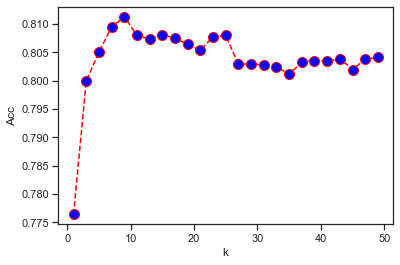

In [59]:
# KNN Model 1 
X = df_update_model1
Y = df_res

#creating train and testing set
X1_train, X1_test, y1_train, y1_test = train_test_split(X, y, test_size = 0.2, random_state = 0)

scoring_param = cross_vali_knn(X1_train, y1_train, 'accuracy')


optimal k value is 9


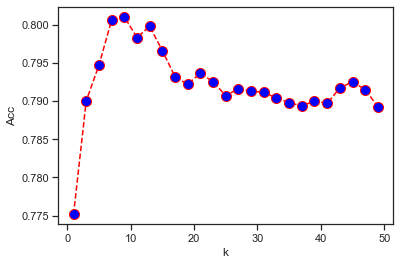

In [60]:
# KNN Model 2
X = df_update_model2
Y = df_res

#creating train and testing set
X2_train, X2_test, y2_train, y2_test = train_test_split(X, y, test_size = 0.2, random_state = 0)

scoring_param = cross_vali_knn(X2_train, y2_train, 'accuracy')


optimal k value is 7


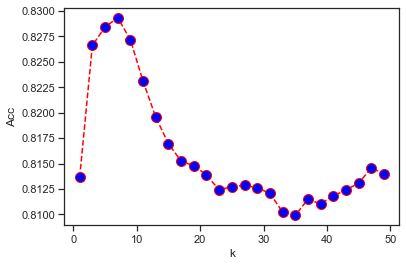

In [61]:
# KNN Model 3
X = df_update_model3
Y = df_res

# Creating train and testing set
X3_train, X3_test, y3_train, y3_test = train_test_split(X, y, test_size = 0.2, random_state = 0)

scoring_param = cross_vali_knn(X3_train, y3_train, 'accuracy')

Model 1

In [62]:
# Use the same model as before
knn_1 = KNeighborsClassifier(n_neighbors = 9)
knn_1= knn_1.fit(X1_train,y1_train)
print("Accuracy of KNN on train set: ",knn_1.score(X1_train,y1_train))
print(X1_train.shape, X1_test.shape,y1_train.shape,y1_test.shape)

# Cross validation.
# Cross validation.
accuracy = cross_val_score(knn_1, X1_train, y1_train, scoring = "accuracy", cv = 10)
recall = cross_val_score(knn_1, X1_train, y1_train, scoring = "recall", cv = 10)
auc = cross_val_score(knn_1, X1_train, y1_train, scoring = "roc_auc", cv = 10)
f1 = cross_val_score(knn_1, X1_train, y1_train, scoring = "f1", cv = 10)
precision = cross_val_score(knn_1, X1_train, y1_train, scoring = "precision", cv = 10)
print(accuracy.mean())
print('---')
print(recall.mean())
print('---')
print(auc.mean())
print('---')
print(f1.mean())
print('---')
print(precision.mean())
print('---')
model1_summary_knn = [accuracy.mean(),recall.mean(),auc.mean(),f1.mean(),precision.mean()]
model1_summary_knn = pd.DataFrame(model1_summary_knn,columns=['KNN_Model1'],index=['accuracy','recall','auc','f1','precision'])
model1_summary_knn

Accuracy of KNN on train set:  0.8459005223711106
(8806, 7) (2202, 7) (8806,) (2202,)
0.8125172840780106
---
0.4950566268748087
---
0.824289040249982
---
0.5922282323454542
---
0.7394344413099178
---


,KNN_Model1
accuracy,0.812517
recall,0.495057
auc,0.824289
f1,0.592228
precision,0.739434


Model 2

In [63]:
# Use the same model as before
knn_2 = KNeighborsClassifier(n_neighbors = 9)
knn_2.fit(X2_train,y2_train)
print("Accuracy of KNN on train set: ",knn_2.score(X2_train,y2_train))
print(X2_train.shape, X2_test.shape,y2_train.shape,y2_test.shape)
# Cross validation.
# Cross validation.
accuracy = cross_val_score(knn_2, X2_train, y2_train, scoring = "accuracy", cv = 10)
recall = cross_val_score(knn_2, X2_train, y2_train, scoring = "recall", cv = 10)
auc = cross_val_score(knn_2, X2_train, y2_train, scoring = "roc_auc", cv = 10)
f1 = cross_val_score(knn_2, X2_train, y2_train, scoring = "f1", cv = 10)
precision = cross_val_score(knn_2, X2_train, y2_train, scoring = "precision", cv = 10)
print(accuracy.mean())
print('---')
print(recall.mean())
print('---')
print(auc.mean())
print('---')
print(f1.mean())
print('---')
print(precision.mean())
print('---')
model2_summary_knn = [accuracy.mean(),recall.mean(),auc.mean(),f1.mean(),precision.mean()]
model2_summary_knn = pd.DataFrame(model2_summary_knn,columns=['KNN_Model2'],index=['accuracy','recall','auc','f1','precision'])
model2_summary_knn


Accuracy of KNN on train set:  0.8377242789007495
(8806, 7) (2202, 7) (8806,) (2202,)
0.8043389485089258
---
0.47854980784273715
---
0.8221467948859418
---
0.5737351678396523
---
0.7176330473691124
---


,KNN_Model2
accuracy,0.804339
recall,0.478550
auc,0.822147
f1,0.573735
precision,0.717633


Model 3

In [64]:
# Use the same model as before
knn_3 = KNeighborsClassifier(n_neighbors = 7)
knn_3.fit(X3_train,y3_train)
print("Accuracy of KNN on train set: ",knn_3.score(X3_train,y3_train))
print(X3_train.shape, X3_test.shape,y3_train.shape,y3_test.shape)
# Cross validation.
# Cross validation.
accuracy = cross_val_score(knn_3, X3_train, y3_train, scoring = "accuracy", cv = 10)
recall = cross_val_score(knn_3, X3_train, y3_train, scoring = "recall", cv = 10)
auc = cross_val_score(knn_3, X3_train, y3_train, scoring = "roc_auc", cv = 10)
f1 = cross_val_score(knn_3, X3_train, y3_train, scoring = "f1", cv = 10)
precision = cross_val_score(knn_3, X3_train, y3_train, scoring = "precision", cv = 10)
print(accuracy.mean())
print('---')
print(recall.mean())
print('---')
print(auc.mean())
print('---')
print(f1.mean())
print('---')
print(precision.mean())
print('---')
model3_summary_knn = [accuracy.mean(),recall.mean(),auc.mean(),f1.mean(),precision.mean()]
model3_summary_knn = pd.DataFrame(model3_summary_knn,columns=['KNN_Model3'],index=['accuracy','recall','auc','f1','precision'])
model3_summary_knn


Accuracy of KNN on train set:  0.8695207812854872
(8806, 10) (2202, 10) (8806,) (2202,)
0.8306854297802084
---
0.5395792946297997
---
0.8487786456759098
---
0.6366288366499465
---
0.7790282207460063
---


,KNN_Model3
accuracy,0.830685
recall,0.539579
auc,0.848779
f1,0.636629
precision,0.779028


In [65]:
all_knn_models = pd.concat([model1_summary_knn, model2_summary_knn,model3_summary_knn],axis=1)
all_knn_models

,KNN_Model1,KNN_Model2,KNN_Model3
accuracy,0.812517,0.804339,0.830685
recall,0.495057,0.478550,0.539579
auc,0.824289,0.822147,0.848779
f1,0.592228,0.573735,0.636629
precision,0.739434,0.717633,0.779028


### SVM Modeling

In the SVM modeling part, we will try to use the different kernel tricks for each model, and then choose a model which has the best performance.

__C__: Regularization parameter. We assigned c as 1(default). The strength of the regularization is inversely proportional to C. Must be strictly positive. The C parameter tells the SVM optimization how much you want to avoid misclassifying each training example.
C stands for penalty, the less the problem of aggregation, but it is possible to overfitting.(default C=1)

__Kernel__: Specifies the kernel type to be used in the algorithm. It must be one of ‘linear’, ‘poly’, ‘rbf’, ‘sigmoid’, ‘precomputed’ or a callable. If none is given, ‘rbf’ will be used. If a callable is given it is used to pre-compute the kernel matrix from data matrices; that matrix should be an array of shape (n_samples, n_samples). (https://scikit-learn.org/stable/modules/generated/sklearn.svm.SVC.html )

For the below svm modeling, we will use three type kernel to train the models.
- linear
- Gaussian (RBF)
- Polynomial 

Explanation:
- When kernel='rbf' (default), it is a Gaussian kernel. The smaller the gamma value, the more continuous the classification interface; the more significant the gamma value, the more "scattered" the classification interface, and the better the classification effect, but it may overfit.
- When decision_function_shape='ovo', it is one v one, which means that the categories are divided between two categories, and the result of multi-category is simulated by the two-category method.

In [66]:
# Load packages
from sklearn import svm
from sklearn.metrics import mean_squared_error
from sklearn.metrics import classification_report, confusion_matrix

In [67]:
# SVM model 1
X = df_update_model1
Y = df_res

# Creating train and testing set
X1_train, X1_test, y1_train, y1_test = train_test_split(X, y, test_size = 0.2, random_state = 0)

In [68]:
# Use the kernel='linear'
model1_linear=svm.SVC(C=1,kernel='linear',decision_function_shape='ovo') 
model1_linear.fit(X1_train,y1_train.ravel())

# Use the cross_val_score function to get the scoring for the model
cross_val_score(model1_linear, X1_train, y1_train, scoring = "accuracy", cv = 5).mean()

0.7233703376409416

In [69]:
# Use the kernel='rbf'
model1_rbf=svm.SVC(C=1,kernel='rbf',gamma=10,decision_function_shape='ovo') 
model1_rbf.fit(X1_train,y1_train.ravel())

# Use the cross_val_score function to get the scoring for the model
cross_val_score(model1_rbf, X1_train, y1_train, scoring = "accuracy", cv = 5).mean()

0.7904833635310655

In [70]:
# Use the kernel='poly'
model1_poly=svm.SVC(C=1,kernel='poly',decision_function_shape='ovo') 
model1_poly.fit(X1_train,y1_train.ravel())

# Use the cross_val_score function to get the scoring for the model
cross_val_score(model1_poly, X1_train, y1_train, scoring = "accuracy", cv = 5).mean()

0.7808304021873858

According to the SVM models with different kernels,, we can choose the model which use the rbf kernel.

In [71]:
# Cross validation.
accuracy = cross_val_score(model1_rbf, X1_train, y1_train, scoring = "accuracy", cv = 10)
recall = cross_val_score(model1_rbf, X1_train, y1_train, scoring = "recall", cv = 10)
auc = cross_val_score(model1_rbf, X1_train, y1_train, scoring = "roc_auc", cv = 10)
f1 = cross_val_score(model1_rbf, X1_train, y1_train, scoring = "f1", cv = 10)
precision = cross_val_score(model1_rbf, X1_train, y1_train, scoring = "precision", cv = 10)
print(accuracy.mean())
print('---')
print(recall.mean())
print('---')
print(auc.mean())
print('---')
print(f1.mean())
print('---')
print(precision.mean())
print('---')
model1_summary_svm = [accuracy.mean(),recall.mean(),auc.mean(),f1.mean(),precision.mean()]
model1_summary_svm = pd.DataFrame(model1_summary_svm,columns=['SVM_Model1'],index=['accuracy','recall','auc','f1','precision'])
model1_summary_svm


0.7912809565576308
---
0.48474985545692617
---
0.810624675557705
---
0.5611005454141071
---
0.6669189795706804
---


,SVM_Model1
accuracy,0.791281
recall,0.484750
auc,0.810625
f1,0.561101
precision,0.666919


Model 2

In [72]:
X = df_update_model2
Y = df_res
# Creating train and testing set
X2_train, X2_test, y2_train, y2_test = train_test_split(X, y, test_size = 0.2, random_state = 0)

In [73]:
# Use the kernel='linear'
model2_linear=svm.SVC(C=1,kernel='linear',decision_function_shape='ovo') 
model2_linear.fit(X2_train,y2_train.ravel())

# Use the cross_val_score function to get the scoring for the model
cross_val_score(model2_linear, X2_train, y2_train, scoring = "accuracy", cv = 5).mean()

0.7245060559827928

In [74]:
# Use the kernel='rbf'
model2_rbf=svm.SVC(C=1,kernel='rbf',gamma=10,decision_function_shape='ovo') 
model2_rbf.fit(X2_train,y2_train.ravel())

# Use the cross_val_score function to get the scoring for the model
cross_val_score(model2_rbf, X2_train, y2_train, scoring = "accuracy", cv = 5).mean()

0.7816258562201206

In [75]:
# Use the kernel='poly'
model2_poly=svm.SVC(C=1,kernel='poly',decision_function_shape='ovo') 
model2_poly.fit(X2_train,y2_train.ravel())

# Use the cross_val_score function to get the scoring for the model
cross_val_score(model2_poly, X2_train, y2_train, scoring = "accuracy", cv = 5).mean()

0.772767833259531

According to the SVM models with different kernels,, we can choose the model which use the rbf kernel.

In [76]:
# Cross validation.
accuracy = cross_val_score(model2_rbf, X2_train, y2_train, scoring = "accuracy", cv = 10)
recall = cross_val_score(model2_rbf, X2_train, y2_train, scoring = "recall", cv = 10)
auc = cross_val_score(model2_rbf, X2_train, y2_train, scoring = "roc_auc", cv = 10)
f1 = cross_val_score(model2_rbf, X2_train, y2_train, scoring = "f1", cv = 10)
precision = cross_val_score(model2_rbf, X2_train, y2_train, scoring = "precision", cv = 10)
print(accuracy.mean())
print('---')
print(recall.mean())
print('---')
print(auc.mean())
print('---')
print(f1.mean())
print('---')
print(precision.mean())
print('---')
model2_summary_svm = [accuracy.mean(),recall.mean(),auc.mean(),f1.mean(),precision.mean()]
model2_summary_svm = pd.DataFrame(model2_summary_svm,columns=['SVM_Model2'],index=['accuracy','recall','auc','f1','precision'])
model2_summary_svm


0.7817409194097615
---
0.4657858041696425
---
0.7469850281841668
---
0.5404559372203369
---
0.6444178174282941
---


,SVM_Model2
accuracy,0.781741
recall,0.465786
auc,0.746985
f1,0.540456
precision,0.644418


Model 3

In [77]:
X = df_update_model3
Y = df_res
#creating train and testing set
X3_train, X3_test, y3_train, y3_test = train_test_split(X, y, test_size = 0.2, random_state = 0)

In [78]:
# Use the kernel='linear'
model3_linear=svm.SVC(C=1,kernel='linear',decision_function_shape='ovo') 
model3_linear.fit(X3_train,y3_train.ravel())

# Use the cross_val_score function to get the scoring for the model
cross_val_score(model3_linear, X3_train, y3_train, scoring = "accuracy", cv = 5).mean()

0.7230296865945918

In [79]:
# Use the kernel='rbf'
model3_rbf=svm.SVC(C=1,kernel='rbf',gamma=10,decision_function_shape='ovo') 
model3_rbf.fit(X3_train,y3_train.ravel())

# Use the cross_val_score function to get the scoring for the model
cross_val_score(model3_rbf, X3_train, y3_train, scoring = "accuracy", cv = 5).mean()

0.790369727240675

In [80]:
# Use the kernel='poly'
model3_poly=svm.SVC(C=1,kernel='poly',decision_function_shape='ovo') 
model3_poly.fit(X3_train,y3_train.ravel())

# Use the cross_val_score function to get the scoring for the model
cross_val_score(model3_poly, X3_train, y3_train, scoring = "accuracy", cv = 5).mean()

0.7786727307064851

According to the SVM models with different kernels,, we can choose the model which use the rbf kernel.

In [81]:
# Cross validation.
accuracy = cross_val_score(model3_rbf, X3_train, y3_train, scoring = "accuracy", cv = 10)
recall = cross_val_score(model3_rbf, X3_train, y3_train, scoring = "recall", cv = 10)
auc = cross_val_score(model3_rbf, X3_train, y3_train, scoring = "roc_auc", cv = 10)
f1 = cross_val_score(model3_rbf, X3_train, y3_train, scoring = "f1", cv = 10)
precision = cross_val_score(model3_rbf, X3_train, y3_train, scoring = "precision", cv = 10)
print(accuracy.mean())
print('---')
print(recall.mean())
print('---')
print(auc.mean())
print('---')
print(f1.mean())
print('---')
print(precision.mean())
print('---')
model3_summary_svm = [accuracy.mean(),recall.mean(),auc.mean(),f1.mean(),precision.mean()]
model3_summary_svm = pd.DataFrame(model3_summary_svm,columns=['SVM_Model3'],index=['accuracy','recall','auc','f1','precision'])
model3_summary_svm


0.7919625167681353
---
0.48970343162262353
---
0.820847900918988
---
0.5641587185628207
---
0.6665672653246465
---


,SVM_Model3
accuracy,0.791963
recall,0.489703
auc,0.820848
f1,0.564159
precision,0.666567


In [82]:
all_svm_models = pd.concat([model1_summary_svm, model2_summary_svm,model3_summary_svm],axis=1)
all_svm_models

,SVM_Model1,SVM_Model2,SVM_Model3
accuracy,0.791281,0.781741,0.791963
recall,0.484750,0.465786,0.489703
auc,0.810625,0.746985,0.820848
f1,0.561101,0.540456,0.564159
precision,0.666919,0.644418,0.666567


### Logistic Modeling

Model 1

In [83]:
# Choose variables for model 1
X = df_update_model1
Y = df_res

# Use the train_test_split function to get the train and test sets
X1_train, X1_test, y1_train, y1_test = train_test_split(X, y, test_size=0.2, random_state=0)

# Perform logistic regression
model1 = LogisticRegression()

# Fit the model: X_train contains our explanatory variables while 
# y_train contains the response variable
model1.fit(X1_train, y1_train)
# Calculate the accuracy of the model relative to the training data set
model1.score(X1_train, y1_train)


0.7468771292300704

In [84]:
# Cross validation.
accuracy = cross_val_score(model1, X1_train, y1_train, scoring = "accuracy", cv = 10)
recall = cross_val_score(model1, X1_train, y1_train, scoring = "recall", cv = 10)
auc = cross_val_score(model1, X1_train, y1_train, scoring = "roc_auc", cv = 10)
f1 = cross_val_score(model1, X1_train, y1_train, scoring = "f1", cv = 10)
precision = cross_val_score(model1, X1_train, y1_train, scoring = "precision", cv = 10)
print(accuracy.mean())
print('---')
print(recall.mean())
print('---')
print(auc.mean())
print('---')
print(f1.mean())
print('---')
print(precision.mean())
print('---')
model1_summary_log = [accuracy.mean(),recall.mean(),auc.mean(),f1.mean(),precision.mean()]
model1_summary_log = pd.DataFrame(model1_summary_log,columns=['Logistic_Model1'],index=['accuracy','recall','auc','f1','precision'])
model1_summary_log


0.7456276442059644
---
0.22587321021664458
---
0.7535481606434078
---
0.3286863130502123
---
0.6064905185738874
---


,Logistic_Model1
accuracy,0.745628
recall,0.225873
auc,0.753548
f1,0.328686
precision,0.606491


Model 2

In [85]:
# Choose variables for model 2
X = df_update_model2
Y = df_res

# Use the train_test_split function to get the train and test sets
X2_train, X2_test, y2_train, y2_test = train_test_split(X, y, test_size=0.2, random_state=0)

# Perform logistic regression
model2 = LogisticRegression()

# Fit the model: X_train contains our explanatory variables while 
# y_train contains the response variable
model2.fit(X2_train, y2_train)
# Calculate the accuracy of the model relative to the training data set
model2.score(X2_train, y2_train)

0.7524415171473995

In [86]:
# Cross validation.
accuracy = cross_val_score(model2, X2_train, y2_train, scoring = "accuracy", cv = 10)
recall = cross_val_score(model2, X2_train, y2_train, scoring = "recall", cv = 10)
auc = cross_val_score(model2, X2_train, y2_train, scoring = "roc_auc", cv = 10)
f1 = cross_val_score(model2, X2_train, y2_train, scoring = "f1", cv = 10)
precision = cross_val_score(model2, X2_train, y2_train, scoring = "precision", cv = 10)
print(accuracy.mean())
print('---')
print(recall.mean())
print('---')
print(auc.mean())
print('---')
print(f1.mean())
print('---')
print(precision.mean())
print('---')
model2_summary_log = [accuracy.mean(),recall.mean(),auc.mean(),f1.mean(),precision.mean()]
model2_summary_log = pd.DataFrame(model2_summary_log,columns=['Logistic_Model2'],index=['accuracy','recall','auc','f1','precision'])
model2_summary_log


0.7526685842534311
---
0.286465666768697
---
0.7634845414340997
---
0.38942470974146587
---
0.6088515267750657
---


,Logistic_Model2
accuracy,0.752669
recall,0.286466
auc,0.763485
f1,0.389425
precision,0.608852


Model 3

In [87]:
# Choose variables for model 3
X = df_update_model3
Y = df_res

# Use the train_test_split function to get the train and test sets
X3_train, X3_test, y3_train, y3_test = train_test_split(X, y, test_size=0.2, random_state=0)

# Perform logistic regression
model3 = LogisticRegression()

# Fit the model: X_train contains our explanatory variables while 
# y_train contains the response variable
model3.fit(X3_train, y3_train)
# Calculate the accuracy of the model relative to the training data set
model3.score(X3_train, y3_train)

0.7599364069952306

In [88]:
# Cross validation.
accuracy = cross_val_score(model3, X3_train, y3_train, scoring = "accuracy", cv = 10)
recall = cross_val_score(model3, X3_train, y3_train, scoring = "recall", cv = 10)
auc = cross_val_score(model3, X3_train, y3_train, scoring = "roc_auc", cv = 10)
f1 = cross_val_score(model3, X3_train, y3_train, scoring = "f1", cv = 10)
precision = cross_val_score(model3, X3_train, y3_train, scoring = "precision", cv = 10)
print(accuracy.mean())
print('---')
print(recall.mean())
print('---')
print(auc.mean())
print('---')
print(f1.mean())
print('---')
print(precision.mean())
print('---')
model3_summary_log = [accuracy.mean(),recall.mean(),auc.mean(),f1.mean(),precision.mean()]
model3_summary_log = pd.DataFrame(model3_summary_log,columns=['Logistic_Model3'],index=['accuracy','recall','auc','f1','precision'])
model3_summary_log


0.7589140697554433
---
0.30377512498724624
---
0.7801727229761491
---
0.40973713264377826
---
0.6301294130889736
---


,Logistic_Model3
accuracy,0.758914
recall,0.303775
auc,0.780173
f1,0.409737
precision,0.630129


In [89]:
all_logistic_models = pd.concat([model1_summary_log, model2_summary_log,model3_summary_log],axis=1)
all_logistic_models

,Logistic_Model1,Logistic_Model2,Logistic_Model3
accuracy,0.745628,0.752669,0.758914
recall,0.225873,0.286466,0.303775
auc,0.753548,0.763485,0.780173
f1,0.328686,0.389425,0.409737
precision,0.606491,0.608852,0.630129


## Select Model

In model selection, we will use the cross-validation method to compare different models based on the performance metrics and choose the best model.

In [90]:
# Show the cross-validation results for each method
all_models = pd.concat([all_knn_models, all_svm_models,all_logistic_models],axis=1)
all_models

,KNN_Model1,KNN_Model2,KNN_Model3,SVM_Model1,SVM_Model2,SVM_Model3,Logistic_Model1,Logistic_Model2,Logistic_Model3
accuracy,0.812517,0.804339,0.830685,0.791281,0.781741,0.791963,0.745628,0.752669,0.758914
recall,0.495057,0.478550,0.539579,0.484750,0.465786,0.489703,0.225873,0.286466,0.303775
auc,0.824289,0.822147,0.848779,0.810625,0.746985,0.820848,0.753548,0.763485,0.780173
f1,0.592228,0.573735,0.636629,0.561101,0.540456,0.564159,0.328686,0.389425,0.409737
precision,0.739434,0.717633,0.779028,0.666919,0.644418,0.666567,0.606491,0.608852,0.630129


These models were under the same condition because of oversampling(SMOTE).

__KNN Models vs SVM Models__
From the above data frame, we can see that KNN_Model3 has the highest accuracy score among these models. 
The AUC score is between 0.8-0.9 zone, which is considered excellent. High precision and high recall give rise to a high f1 score. In this case, we do more care about whether customers buy products. According to the cross-validation results, the scores of KNN_Model3 are more significant than other model scores, so we prefer to choose the KNN_Model3. 

__KNN_Model3 vs Logistic Models__
The performance metric of KNN_Model3 still performs better than logistic models. For logistic models, their AUC scores are between 0.7-0.8zone, which is considered acceptable but lower than KNN Model3 AUC scores. The precision and recall are also lower than KNN Model3. 

In other words, we choose KNN_Model3 as our preferred model in the nine models. Then we will test KNN model3 and compare the score result with train set result.


In [91]:
# Use the KNN model3 to test our prediction
knn_3 = KNeighborsClassifier(n_neighbors = 7)
knn_3.fit(X3_train,y3_train)

test_Y_pred = knn_3.predict(X3_test)
print("Accuracy of KNN on test set: ",knn_3.score(X3_test,y3_test))
print("Testing MSE:", mean_squared_error(y3_test, test_Y_pred))
print("Testing RMSE:", np.sqrt(mean_squared_error(y3_test, test_Y_pred)))
print(confusion_matrix(y3_test, test_Y_pred))
print(classification_report(y3_test, test_Y_pred))

Accuracy of KNN on test set:  0.8351498637602179
Testing MSE: 0.164850136239782
Testing RMSE: 0.4060174087890592
[[1523   97]
 [ 266  316]]
              precision    recall  f1-score   support

           0       0.85      0.94      0.89      1620
           1       0.77      0.54      0.64       582

    accuracy                           0.84      2202
   macro avg       0.81      0.74      0.76      2202
weighted avg       0.83      0.84      0.83      2202



The test set score of KNN model3 is 0.835, close to the train set score of KNN model3(0.87). The preferred model performs as well as expected.

## Conclusion

- We noticed that the dataset is imbalanced via EDA, and imbalanced data would hinder model performance, so we did an over-sample (SMOTE) in the data preparation part.
- After creating nine models(KNN, SVM, and Logistic models) to compare which models have the most outstanding performance metrics, we found KNN model 3 performed the best as well as we expected. For this model, the optimal K value was 7.
- Using KNN Model3 might help the companies to predict whether or not a given existing customer is likely to purchase an additional insurance project from the companies.

## Reference

- https://www.youtube.com/watch?v=j-uHsi-KjOs&ab_channel=MonkHaus
- https://scikit-learn.org/stable/modules/generated/sklearn.svm.SVC.html
- https://www.kaggle.com/rluyck/selling-a-new-insurance-product
- https://nbviewer.org/gist/justmarkham/6d5c061ca5aee67c4316471f8c2ae976